# Medicion Indirecta de G.



<div class="row">
    <div class="col">
        <h2 id="caso1">Fórmulas del plano inclinado sin fricción</h2>
        <p>En un plano inclinado sin fricción, un bloque experimentará una aceleración únicamente debido a su peso.</p>
        <p>Sabemos que la fuerza debido al peso es igual a $mg$ y que tiene dirección vertical con sentido hacia abajo.</p>
        <p>Por otro lado, el bloque solo puede moverse en el eje definido por el plano inclinado. En este caso, definimos el eje $x$ con la misma dirección que el plano inclinado y con el sentido positivo hacia abajo.</p>
        <center><img src="https://www.calcuvio.com/images/all/plano_inclinado.png" alt="Plano inclinado" width="250" ></center>
        <p>La <b><a class="link" target="_blank" rel="noopener noreferrer" href="/segunda-ley-newton">segunda ley de Newton</a></b> dice que la fuerza aplicada sobre un cuerpo es igual a la masa multiplicada por la aceleración.</p>
        <p class="of">$$F=ma$$</p>
        <p>Esto significa que si queremos conocer la aceleración del bloque en el eje $x$ tan solo debemos conocer la fuerza aplicada en este eje y la masa del bloque.</p>
        <p>Aplicando relaciones trigonométricas básicas podemos descomponer el peso en sus componentes $x$ y $y$ definidas a partir del ángulo del plano inclinado ($\theta$):</p>
        <center><img src="https://www.calcuvio.com/images/all/plano_inclinado_peso.png" alt="Descomposición del peso en dos ejes" width="250" ></center>
        <p class="of">$$\begin{gathered}P_x=P\sin\theta=mg\sin\theta\\P_y=P\cos\theta=mg\cos\theta\\\end{gathered}$$</p>
        <p>Si escribimos ahora la segunda ley de Newton correspondiente al eje $x$ obtenemos la aceleración del cuerpo en este eje:</p>
        <p class="of">$$F_x = ma_x = mg\sin\theta$$</p>
        <p>En consecuencia, podemos deducir que la aceleración del cuerpo a lo largo de un plano inclinado si no hay fricción es igual a:</p>
        <p class="of">$$a = g\sin\theta$$</p>
        <p>A partir de este resultado se concluye que la aceleración de un bloque en un plano inclinado <b>sin considerar la fricción</b> es independiente del peso del bloque. Esto implica que en absencia de fricción cualquier bloque independientemente de su masa experimentaría la misma aceleración.</p></div>



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
#para embeber videos de yt
from IPython.display import YouTubeVideo
from bokeh.plotting import figure, output_notebook, show
# activamos boke
output_notebook()


Loading BokehJS ...

### Realizamos la medicion de la velocidad de rodadura



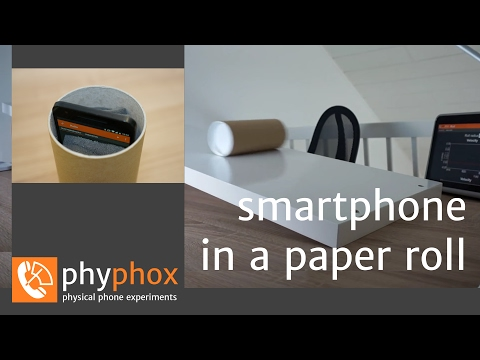

In [25]:
YouTubeVideo('gPq4Le9kXWE',  width=848, height=480)

<img src="1.jpeg" alt="drawing" width="600"/>

<img src="2.jpeg" alt="drawing" width="600"/>

<img src="3.jpeg" alt="drawing" width="600"/>

In [59]:
%%HTML
<video width="800"  controls>
  <source src="video.mp4" type="video/mp4">
</video>

Una vez que exportamos los datos ('.csv') desde la pagina o desde el celular, los levantamos con pandas. Son 3 columnas:

```
"Time (s)","Velocity (m/s)","Gyroscope y (rad/s)"
3.293477158E0,6.081997226E-3,1.105817677E-1
3.334124432E0,1.453178740E-2,2.642143164E-1
3.374782491E0,2.349394089E-2,4.271625616E-1
``` 

con **names** le pongo el nombre que yo quiera a las columnas

y con **header** saco las filas que no son datos

In [26]:
rdata=pd.read_csv('v2.csv',names=['t','v','rad'],header=0)
rdata

,t,v,rad
0,3.293477,0.006082,0.110582
1,3.334124,0.014532,0.264214
2,3.374782,0.023494,0.427163
3,3.415448,0.024561,0.446558
4,3.456109,0.027299,0.496343
...,...,...,...
495,23.420504,-0.000004,-0.000069
496,23.461167,0.000013,0.000236
497,23.501827,-0.000004,-0.000069
498,23.542483,0.000038,0.000694


In [61]:
# creamos la instancia figura
p = figure(plot_width=1200, plot_height=500)

# y añadimos los graficos que necesitemos, aca uno solo
p.scatter(rdata.t,rdata.v)
p.line(rdata.t,rdata.v)


# mostramos la figura con todos los graficos
show(p)

### No podriamos hacer algo para sacarnos el ruido?

In [60]:
# creamos la instancia figura
p = figure(plot_width=1200, plot_height=500)

# y añadimos los graficos que necesitemos, aca uno solo
p.scatter(rdata.t,rdata.v)

# agrego una linea que promedia las mediciones

p.line(rdata.t,rdata.v.rolling(window=20,center=True).mean(),color='red')

# mostramos la figura con todos los graficos
show(p)

Puedo crear una nueva columna para analizar esos datos

In [38]:
rdata['vp20']=rdata.v.rolling(window=20,center=True).mean()

In [39]:
rdata

,t,v,rad,vp20
0,3.293477,0.006082,0.110582,NaN
1,3.334124,0.014532,0.264214,NaN
2,3.374782,0.023494,0.427163,NaN
3,3.415448,0.024561,0.446558,NaN
4,3.456109,0.027299,0.496343,NaN
...,...,...,...,...
495,23.420504,-0.000004,-0.000069,NaN
496,23.461167,0.000013,0.000236,NaN
497,23.501827,-0.000004,-0.000069,NaN
498,23.542483,0.000038,0.000694,NaN


In [41]:
rdata.vp20[20:]

20     0.000102
21    -0.000464
22    -0.001003
23    -0.001327
24    -0.002153
         ...   
495         NaN
496         NaN
497         NaN
498         NaN
499         NaN
Name: vp20, Length: 480, dtype: float64

In [47]:
#vmin=0
rdata.vp20.min()

-0.002153188596184999

In [52]:
#vmax?
rdata.vp20.max()

1.2296654133999994

In [53]:
#cuando?
rdata.vp20.idxmax()

193

In [54]:
rdata.vp20[rdata.vp20.idxmax()]

1.2296654133999994

In [ ]:
# am=(vmax-vmin)/dt

## Como definimos dt?

In [55]:
# creamos la instancia figura
p = figure(plot_width=1200, plot_height=500)
p.scatter(rdata.t,rdata.v)
p.line(rdata.t,rdata.v.rolling(window=20,center=True).mean(),color='red')
show(p)

## Como definimos el angulo?


<img src="4.jpg">

# ImageJ

https://imagej.nih.gov/ij/download.html

<img src="6.png">

<img src="7.png">

<img src="5.png">